# 1. Machine Learning Methods

In this notebook I'll be exploring the results of the following Machine Learning methods for our fraud detection problem using only their default settings:

* Logistic Regression
* Decision Tree
* Naive Bayes
* KNN

We'll be exploring how they compare against each other and these results will be used as a baseline to be compared against our better methods later

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedShuffleSplit, train_test_split


import fraudutils as futils
import warnings

warnings.filterwarnings(action='once')

%load_ext autoreload
%autoreload 2
%matplotlib inline

Our data will be loaded and then splitted into train and test using 80/20 ratio.

In [2]:
cc_df = pd.read_csv('../../../data/raw/creditcard-fraud/creditcard.csv')
X_ = cc_df.drop(['Time', 'Class'], axis=1)
y_ = cc_df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=0, stratify=y_)

I'll be comparing classifiers the result of our classifiers applying undersampling and oversampling as shown bellow.

The metrics used below are accuracy, precision and recall, these are defined as:

$$Accuracy = \dfrac{TruePositive + TrueNegative}{TruePositive + FalsePositive + TrueNegative + FalseNegative}$$

$$Precision = \dfrac{TruePositive}{TruePositive + FalsePositive}$$

$$Recall = \dfrac{TruePositive}{TruePositive + TrueNegative}$$

In this analysis I'll be considering fraudulent examples as positives and non-fraudulents as negatives.

With the previous data split, we should have:

In [3]:
print("Train Data:")
print("Non-fraudulent: {}".format(len([x for x in y_train if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_train if x == 1])))

print("\nTest Data:")
print("Non-fraudulent: {}".format(len([x for x in y_test if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_test if x == 1])))

Train Data:
Non-fraudulent: 227451
Fraudulent: 394

Test Data:
Non-fraudulent: 56864
Fraudulent: 98


In [4]:
c_scores = {}

### Running Classifiers

Logistic regression results:
Mean accuracy: 0.9991748885221726
Mean precision: 0.8493150684931506
Mean recall: 0.6326530612244898
AUPRC: 0.5379537783071681
AUROC: 0.8162298086088685


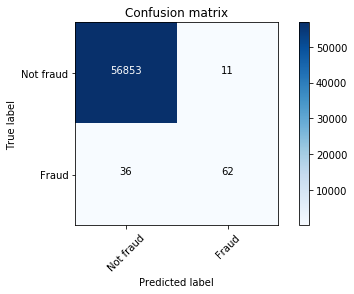

Decision tree results:
Mean accuracy: 0.9991924440855307
Mean precision: 0.7708333333333334
Mean recall: 0.7551020408163265
AUPRC: 0.5824791566498444
AUROC: 0.8773575764014102


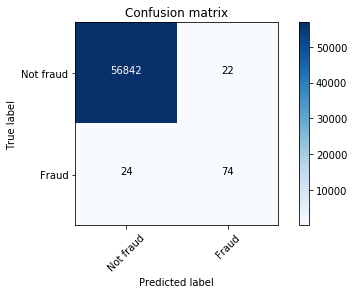

Naive Bayes results:
Mean accuracy: 0.9777571012253783
Mean precision: 0.06019563581640331
Mean recall: 0.8163265306122449
AUPRC: 0.04945529468444721
AUROC: 0.8971809214681934


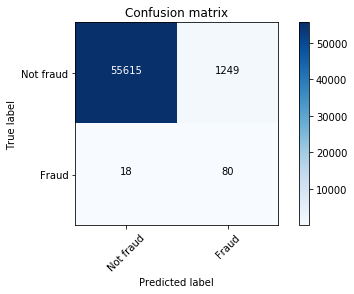

KNN results:
Mean accuracy: 0.9992275552122467
Mean precision: 0.9354838709677419
Mean recall: 0.5918367346938775
AUPRC: 0.5543559420866582
AUROC: 0.7958831957093474


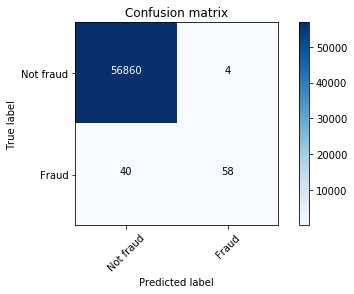

In [5]:
print("Logistic regression results:")
c_scores['logistic_regression'] = futils.classify(X_train, X_test, y_train, y_test, classifier=LogisticRegression, normalized=False)
print("Decision tree results:")
c_scores['decision_tree'] = futils.classify(X_train, X_test, y_train, y_test, classifier=DecisionTreeClassifier, normalized=False)
print("Naive Bayes results:")
c_scores['naive_bayes'] = futils.classify(X_train, X_test, y_train, y_test, classifier=GaussianNB, normalized=False)
print("KNN results:")
c_scores['knn'] = futils.classify(X_train, X_test, y_train, y_test, classifier=KNeighborsClassifier, normalized=False)

## Scores

In [6]:
scores = pd.DataFrame(c_scores)
scores

,logistic_regression,decision_tree,naive_bayes,knn
AUPRC,0.537954,0.582479,0.049455,0.554356
AUROC,0.816230,0.877358,0.897181,0.795883
accuracy,0.999175,0.999192,0.977757,0.999228
precision,0.849315,0.770833,0.060196,0.935484
recall,0.632653,0.755102,0.816327,0.591837
